In [17]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração visual
sns.set(style="whitegrid")

# **Consulta SQL - Carregamento base dados**

In [ ]:
# Caminho do banco SQL
db_path = r"C:\Users\rafae.RAFAEL_NOTEBOOK\Downloads\Case_tecnico_Koin\sql\case_koin.db"

# Conecta ao banco
conn = sqlite3.connect(db_path)

print("Conectado ao banco com sucesso!")

Conectado ao banco com sucesso!


In [3]:
# 1. Visualizar tabelas
query_tables = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query_tables, conn)
print("\nTabelas no banco:")
print(tables)


Tabelas no banco:
             name
0  dados_tratados


In [ ]:
# Visualizar estrutura da tabela
query_schema = "PRAGMA table_info(dados_tratados);"
schema = pd.read_sql(query_schema, conn)
print("\nEstrutura da tabela dados_tratados:")
print(schema)


Estrutura da tabela dados_tratados:
    cid                  name       type  notnull dflt_value  pk
0     0                 safra    INTEGER        0       None   0
1     1           data_compra  TIMESTAMP        0       None   0
2     2        hora_da_compra    INTEGER        0       None   0
3     3       tipo_de_cliente    INTEGER        0       None   0
4     4          valor_compra       REAL        0       None   0
5     5  tempo_ate_utilizacao       REAL        0       None   0
6     6           over30_mob3    INTEGER        0       None   0
7     7        provedor_email       TEXT        0       None   0
8     8         idade_cliente       REAL        0       None   0
9     9             produto_1    INTEGER        0       None   0
10   10             produto_2    INTEGER        0       None   0
11   11             produto_3    INTEGER        0       None   0
12   12                    uf       TEXT        0       None   0
13   13                 renda       REAL        0    

In [5]:
# Total de registros

query_count = "SELECT COUNT(*) AS total_registros FROM dados_tratados;"
df_count = pd.read_sql(query_count, conn)
print("\nTotal de registros:")
print(df_count)


Total de registros:
   total_registros
0            32842


In [6]:
# Distribuição da variável alvo

query_target = """
SELECT over30_mob3, COUNT(*) AS quantidade
FROM dados_tratados
GROUP BY over30_mob3;
"""
df_target = pd.read_sql(query_target, conn)
print("\nDistribuição da variável alvo:")
print(df_target)


Distribuição da variável alvo:
   over30_mob3  quantidade
0            0       28687
1            1        4155


In [7]:
# Média de valor de compra por classe

query_valor = """
SELECT over30_mob3,
       AVG(valor_compra) AS media_valor_compra
FROM dados_tratados
GROUP BY over30_mob3;
"""
df_valor = pd.read_sql(query_valor, conn)
print("\nMédia do valor de compra por classe:")
print(df_valor)


Média do valor de compra por classe:
   over30_mob3  media_valor_compra
0            0         3124.641248
1            1         2806.395259


In [8]:
# Inadimplência por tipo de cliente

query_tipo_cliente = """
SELECT tipo_de_cliente,
       over30_mob3,
       COUNT(*) AS total
FROM dados_tratados
GROUP BY tipo_de_cliente, over30_mob3
ORDER BY tipo_de_cliente;
"""
df_tipo = pd.read_sql(query_tipo_cliente, conn)
print("\nInadimplência por tipo de cliente:")
print(df_tipo)


Inadimplência por tipo de cliente:
   tipo_de_cliente  over30_mob3  total
0                1            0  18456
1                1            1   2915
2                2            0   2010
3                2            1    526
4                3            0    617
5                3            1     91
6                4            0   7604
7                4            1    623


In [10]:
# Inadimplência por UF

query_uf = """
SELECT uf,
       over30_mob3,
       COUNT(*) AS total
FROM dados_tratados
GROUP BY uf, over30_mob3
ORDER BY uf;
"""
df_uf = pd.read_sql(query_uf, conn)
print("\nInadimplência por UF:")
df_uf


Inadimplência por UF:


,uf,over30_mob3,total
0,AC,0,30
1,AC,1,8
2,AL,0,159
3,AL,1,36
4,AM,0,499
5,AM,1,84
6,AP,0,112
7,AP,1,19
8,BA,0,844
9,BA,1,181


In [12]:
# Média de idade por classe

query_idade = """
SELECT over30_mob3,
       AVG(idade_cliente) AS media_idade
FROM dados_tratados
GROUP BY over30_mob3;
"""
df_idade = pd.read_sql(query_idade, conn)
print("\nMédia de idade por classe:")
df_idade


Média de idade por classe:


,over30_mob3,media_idade
0,0,35.162931
1,1,34.798075


In [14]:
# Média de renda por classe

query_renda = """
SELECT over30_mob3,
       AVG(renda) AS media_renda
FROM dados_tratados
GROUP BY over30_mob3;
"""
df_renda = pd.read_sql(query_renda, conn)
print("\nMédia de renda por classe:")
df_renda


Média de renda por classe:


,over30_mob3,media_renda
0,0,7544.112316
1,1,5603.128761


# **Análise de dados**

In [19]:
# Conexão com o banco
db_path = r"C:\Users\rafae.RAFAEL_NOTEBOOK\Downloads\Case_tecnico_Koin\sql\case_koin.db"
conn = sqlite3.connect(db_path)

# Lê a tabela do banco para um DataFrame
query = "SELECT * FROM dados_tratados"
df = pd.read_sql(query, conn)

conn.close()
print("Dados carregados do banco SQL com sucesso!")

Dados carregados do banco SQL com sucesso!


C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25492\1042846624.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="over30_mob3", palette="Blues")


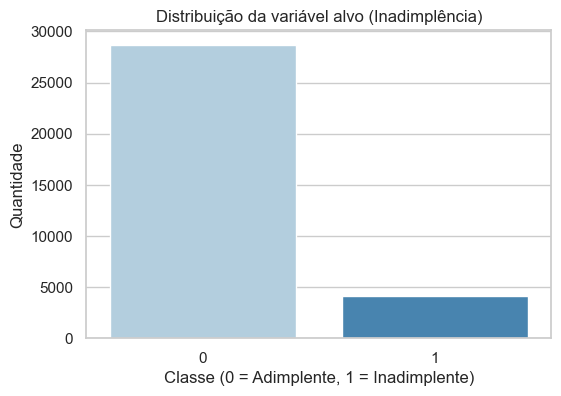

In [20]:
# Distribuição da variável alvo

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="over30_mob3", palette="Blues")
plt.title("Distribuição da variável alvo (Inadimplência)")
plt.xlabel("Classe (0 = Adimplente, 1 = Inadimplente)")
plt.ylabel("Quantidade")
plt.show()

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25492\4051985529.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="over30_mob3", y="valor_compra", palette="Set2")


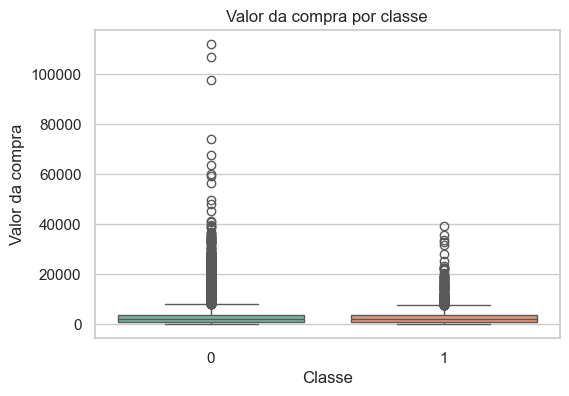

In [21]:
# Valor da compra por classe

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="over30_mob3", y="valor_compra", palette="Set2")
plt.title("Valor da compra por classe")
plt.xlabel("Classe")
plt.ylabel("Valor da compra")
plt.show()

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25492\2709547243.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="over30_mob3", y="idade_cliente", palette="Set3")


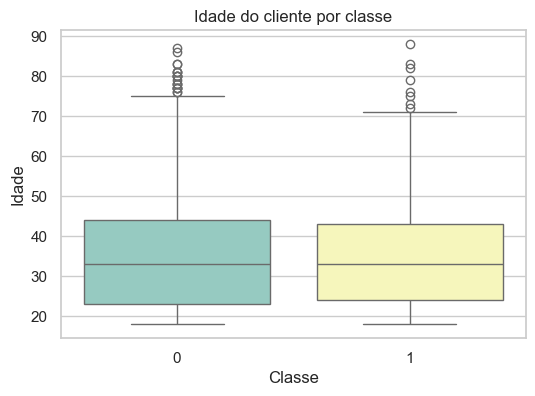

In [22]:
# Idade por classe

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="over30_mob3", y="idade_cliente", palette="Set3")
plt.title("Idade do cliente por classe")
plt.xlabel("Classe")
plt.ylabel("Idade")
plt.show()

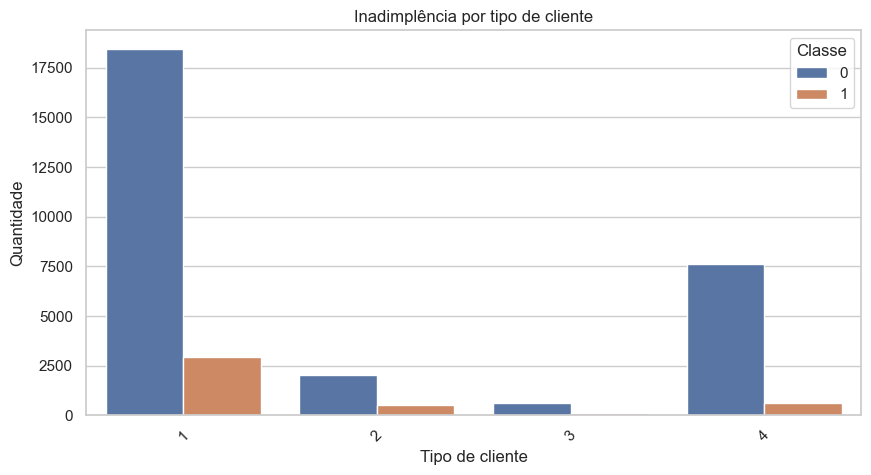

In [23]:
# Inadimplência por tipo de cliente

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="tipo_de_cliente", hue="over30_mob3")
plt.title("Inadimplência por tipo de cliente")
plt.xlabel("Tipo de cliente")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.legend(title="Classe")
plt.show()

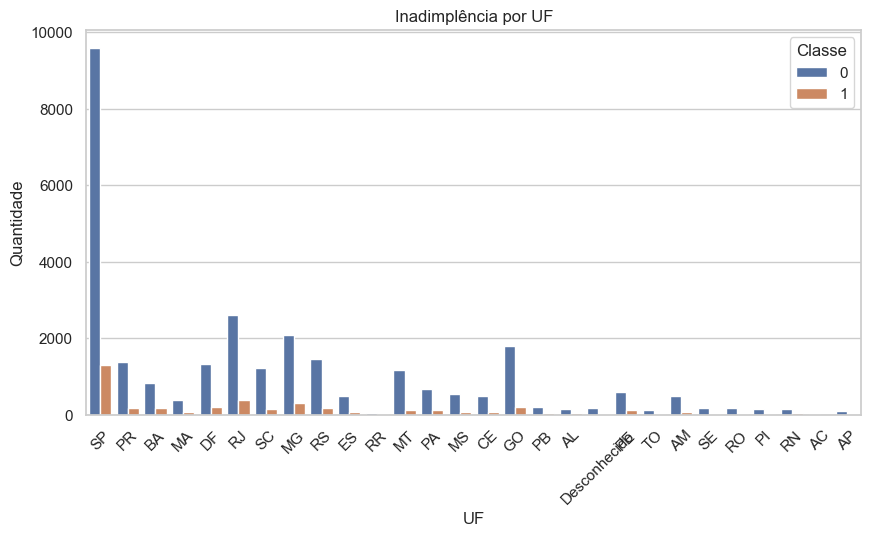

In [24]:
# Inadimplência por UF

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="uf", hue="over30_mob3")
plt.title("Inadimplência por UF")
plt.xlabel("UF")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.legend(title="Classe")
plt.show()

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25492\2758335636.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="over30_mob3", y="renda", palette="coolwarm")


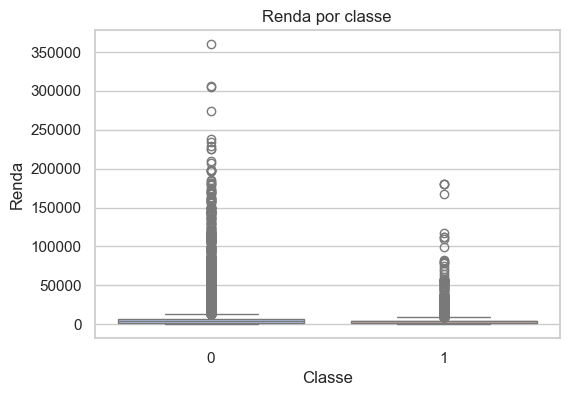

In [25]:
# Renda por classe

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="over30_mob3", y="renda", palette="coolwarm")
plt.title("Renda por classe")
plt.xlabel("Classe")
plt.ylabel("Renda")
plt.show()

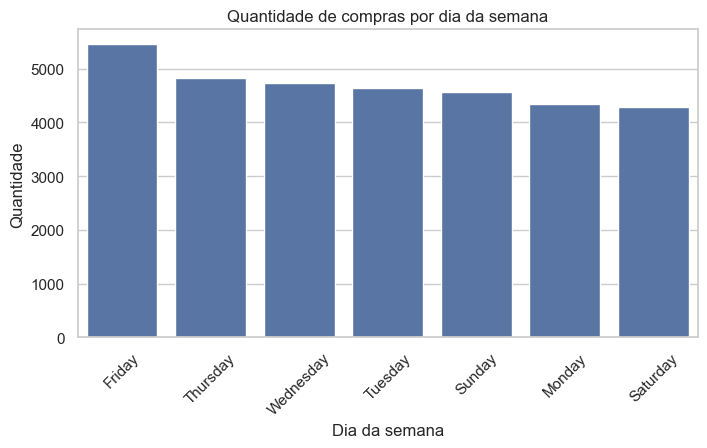

Análise com gráficos finalizada!


In [26]:
# Compras por dia da semana

plt.figure(figsize=(8,4))
sns.countplot(data=df, x="dia_semana", order=df["dia_semana"].value_counts().index)
plt.title("Quantidade de compras por dia da semana")
plt.xlabel("Dia da semana")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.show()


print("Análise com gráficos finalizada!")

In [ ]:
# Encerrar conexão

conn.close()
print("\nConexão encerrada.")